In [148]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import tensorflow.keras.datasets
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Input, Dense
from sklearn.model_selection import train_test_split

In [149]:
#print(mnist.load_data())
(train_x, train_y), (test_x, test_y) = mnist.load_data()

train_x = train_x /255
test_x = test_x /225

train_x = np.reshape (train_x, (len(train_x), 28*28))
test_x = np.reshape (test_x, (len(test_x), 28*28))

# Разделение на тренировочный и тестовый наборы данных
train_x, test_x = train_test_split(train_x, test_size=0.2, random_state=42)

# Разделение тестового набора на тестовый и валидационный наборы данных
test_x, val_x = train_test_split(test_x, test_size=0.5, random_state=42)

# Проверка размеров наборов данных
print("Размер тренировочного набора данных:", train_x.shape)
print("Размер тестового набора данных:", test_x.shape)
print("Размер валидационного набора данных:", val_x.shape)

Размер тренировочного набора данных: (48000, 784)
Размер тестового набора данных: (6000, 784)
Размер валидационного набора данных: (6000, 784)


In [150]:
inputs = Input(shape= (28*28, ))

x = Dense(150, activation = 'relu')(inputs)
x = Dense(40, activation = 'relu')(x)
x = Dense(10, activation = 'relu')(x)
encoder = Dense(3, activation = 'sigmoid') (x)

inputs_dec= Input(shape= (3, ))
x = Dense(10, activation = 'relu')(inputs_dec)
x = Dense(40, activation = 'relu')(x)
x = Dense(150, activation = 'relu')(x)
decoder = Dense(28*28, activation = 'relu')(x)

In [151]:
encoder_model = keras.Model(inputs, encoder)
decoder_model = keras.Model(inputs_dec, decoder)

autoenc = keras.Model(inputs, decoder_model(encoder_model(inputs)) )

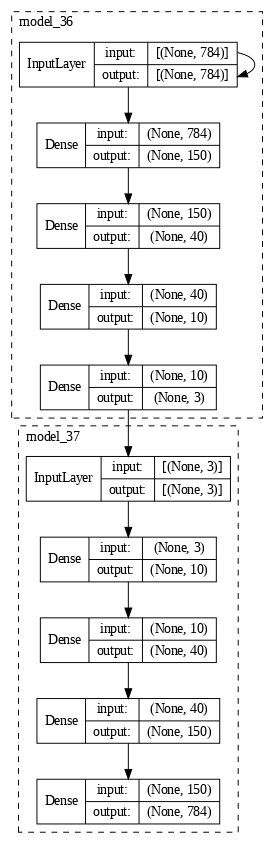

In [152]:
from tensorflow.keras.utils import plot_model
plot_model(autoenc, expand_nested=True, show_shapes = True, show_layer_names=False, dpi = 70)

In [153]:
input_shape = (28*28,)  # Размерность входного изображения
encoder_layers = [150, 40, 10, 3]  # Размеры слоев кодирования
decoder_layers = [10, 40, 150, 28*28]  # Размеры слоев декодирования

# Расчет общего количества обучаемых параметров в encoder
encoder_trainable_params = 0
for i in range(len(encoder_layers)-1):
    prev_layer_size = encoder_layers[i]
    curr_layer_size = encoder_layers[i+1]
    encoder_trainable_params += (prev_layer_size * curr_layer_size) + curr_layer_size

# Расчет общего количества обучаемых параметров в decoder
decoder_trainable_params = 0
for i in range(len(decoder_layers)-1):
    prev_layer_size = decoder_layers[i]
    curr_layer_size = decoder_layers[i+1]
    decoder_trainable_params += (prev_layer_size * curr_layer_size) + curr_layer_size

# Общее количество обучаемых параметров
total_trainable_params = encoder_trainable_params + decoder_trainable_params

print("Общее количество обучаемых параметров:", total_trainable_params)

Общее количество обучаемых параметров: 131457


In [154]:
#Алгоритм оптимизации и функция ошибок
autoenc.compile(optimizer= 'adam', loss = 'mse', metrics =['accuracy'])

In [155]:
autoencoder_history = autoenc.fit(train_x,train_x,
                          epochs=20,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(val_x, val_x))

# Вывод значений функции потерь
train_loss = autoencoder_history.history['loss']
val_loss = autoencoder_history.history['val_loss']
print("Train Loss:", train_loss)
print("Validation Loss:", val_loss)

# Вывод значений точности
train_acc = autoencoder_history.history['accuracy']
val_acc = autoencoder_history.history['val_accuracy']
print("Train Accuracy:", train_acc)
print("Validation Accuracy:", val_acc)

Epoch 1/20
188/188 [==============================] - 3s 11ms/step - loss: 0.0865 - accuracy: 0.0087 - val_loss: 0.0808 - val_accuracy: 0.0075
Epoch 2/20
188/188 [==============================] - 2s 10ms/step - loss: 0.0656 - accuracy: 0.0122 - val_loss: 0.0554 - val_accuracy: 0.0143
Epoch 3/20
188/188 [==============================] - 2s 13ms/step - loss: 0.0526 - accuracy: 0.0132 - val_loss: 0.0501 - val_accuracy: 0.0122
Epoch 4/20
188/188 [==============================] - 2s 12ms/step - loss: 0.0494 - accuracy: 0.0113 - val_loss: 0.0481 - val_accuracy: 0.0077
Epoch 5/20
188/188 [==============================] - 2s 10ms/step - loss: 0.0474 - accuracy: 0.0089 - val_loss: 0.0464 - val_accuracy: 0.0112
Epoch 6/20
188/188 [==============================] - 2s 10ms/step - loss: 0.0452 - accuracy: 0.0083 - val_loss: 0.0443 - val_accuracy: 0.0078
Epoch 7/20
188/188 [==============================] - 2s 10ms/step - loss: 0.0443 - accuracy: 0.0087 - val_loss: 0.0437 - val_accuracy: 0.0082

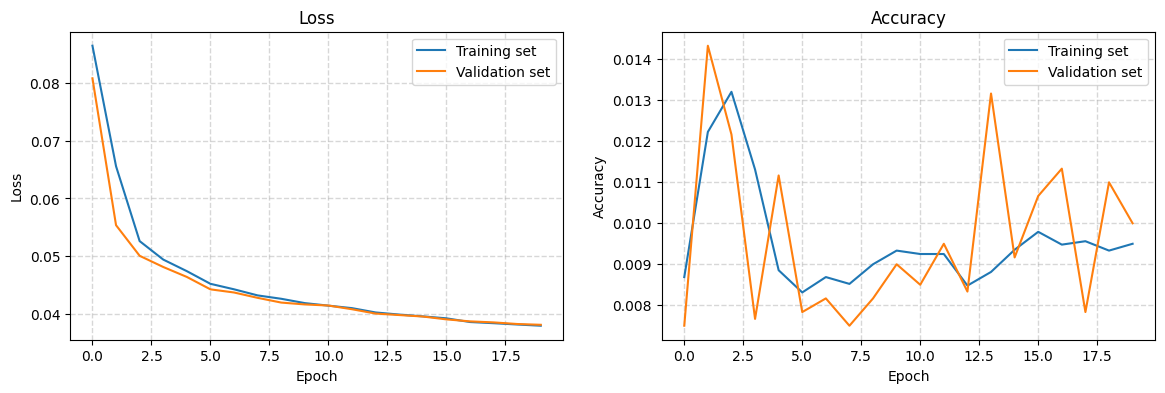

In [156]:
#Графики loss и accuracy
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))
    # Графики для метрик loss и val_loss
    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Validation set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    # Графики для метрик accuracy и val_accuracy
    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Validation set')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()
render_training_history(autoencoder_history)

In [157]:
# Значение метрик на тестовом датасете
autoenc.evaluate(test_x, test_x)

188/188 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 0.0090


[0.03838113695383072, 0.008999999612569809]

188/188 [==============================] - 0s 1ms/step


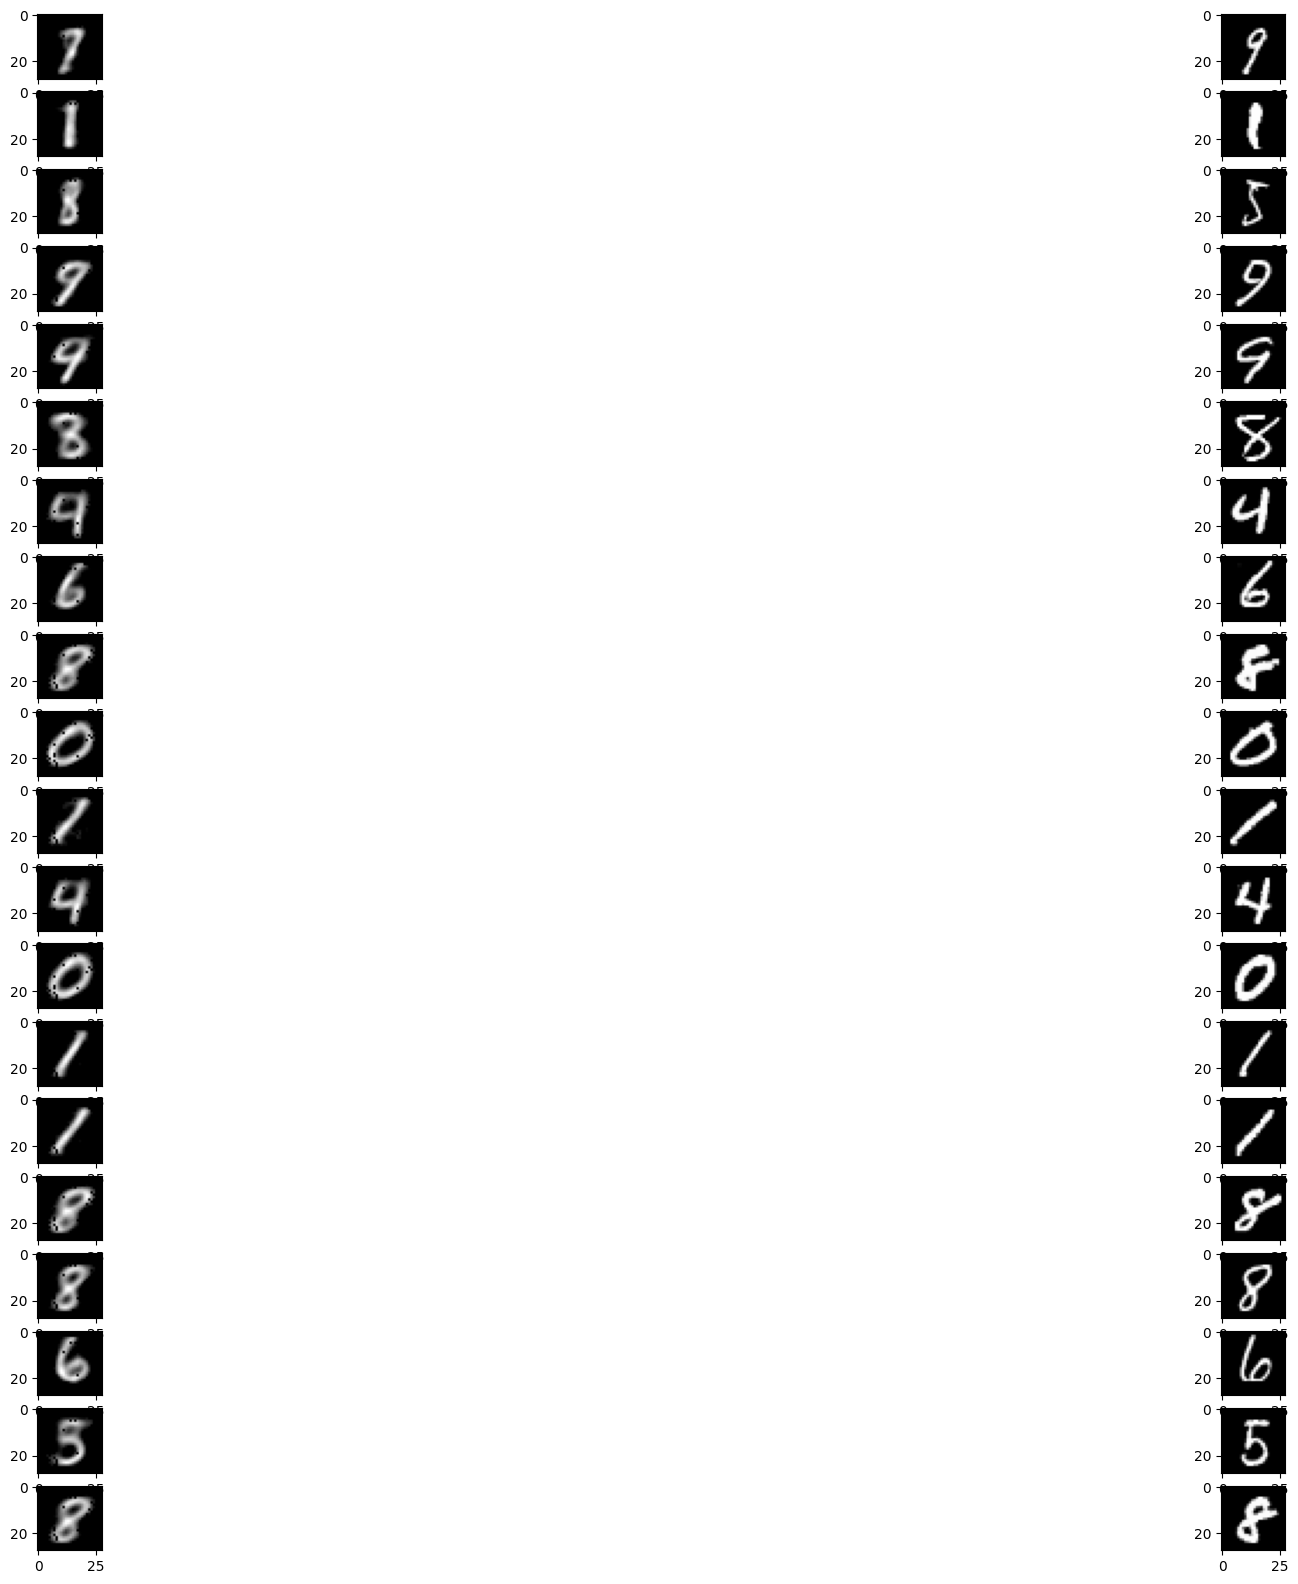

In [158]:
y = autoenc.predict(test_x)
y = y.reshape(6000, 28, 28)

plt.figure(figsize=(28, 28))

for i in range(20):
    k = i * 2
    plt.subplot(28, 2, k+1)
    plt.imshow(y[i], cmap = 'gray')
    plt.subplot( 28, 2, k+2)
    plt.imshow(test_x[i].reshape(28,28), cmap = 'gray')

plt.show()

In [159]:
import tensorflow as tf
tf.saved_model.save(autoenc, 'task6_model')

In [163]:
from google.colab import drive

# Монтирование Google Диска
drive.mount('/content/drive', force_remount=True)

# Путь к файлу, который нужно сохранить на Google Диск
file_path = "/content/task6_model/saved_model.pb"
file_name = "saved_model.pb"

save_path = "/content/drive/MyDrive/" + file_name

# Копирование файла на Google Диск
!cp $file_path $save_path

Mounted at /content/drive
